In [3]:
import StableDiffusion.ModelConverter

diffusionDict = StableDiffusion.ModelConverter.load_from_standard_weights(input_file='./models/inkpunk-diffusion-v1.ckpt',\
                                                            device = 'cuda')
print(type(diffusionDict))

<class 'dict'>


In [3]:
for key in diffusionDict.keys():
    print(key)

for value in diffusionDict.values():
    print(value)

diffusionDict['clip']

        -3.8757e-02,  1.4600e-01, -1.8506e-01, -6.1893e-04, -3.5498e-01,
         1.2494e-01,  1.4417e-01, -7.9041e-02,  1.2262e-01, -4.6631e-02,
         1.5674e-01,  3.2642e-01, -3.0786e-01,  1.6028e-01, -1.2634e-01,
         8.5510e-02, -9.7534e-02, -2.6001e-01,  5.2539e-01,  1.1810e-01,
        -1.3721e-01, -8.4351e-02, -4.2285e-01, -2.7351e-03,  2.3926e-01,
        -1.0730e-01, -1.5405e-01,  2.5854e-01], device='cuda:0',
       dtype=torch.float16), 'layers.11.layernorm_1.weight': tensor([1.8848, 1.8350, 1.8770, 1.8809, 1.5566, 1.8838, 1.8916, 1.8105, 1.9873,
        1.8984, 1.8125, 1.8701, 1.9131, 1.9102, 1.8047, 1.8730, 1.9492, 1.9580,
        1.8740, 0.5698, 1.9375, 1.8574, 1.8018, 1.7803, 1.9043, 1.8594, 1.8652,
        1.9072, 1.7910, 1.9277, 1.9023, 1.8203, 1.8223, 1.9473, 1.8164, 1.9287,
        1.8477, 1.8643, 1.7705, 1.7725, 1.8154, 1.9277, 1.8711, 1.8701, 1.8984,
        1.8340, 1.8193, 1.9658, 1.9062, 1.8223, 1.9512, 1.9746, 1.7754, 1.7402,
        1.8770, 1.9678, 1.930

{'embedding.token_embedding.weight': tensor([[-0.0012,  0.0368,  0.0221,  ...,  0.0158,  0.0046, -0.0219],
         [ 0.0152,  0.0262, -0.0132,  ..., -0.0037,  0.0002,  0.0121],
         [-0.0154, -0.0131,  0.0065,  ..., -0.0206, -0.0139, -0.0025],
         ...,
         [ 0.0102, -0.0030, -0.0150,  ..., -0.0084, -0.0206,  0.0114],
         [ 0.0010,  0.0031,  0.0003,  ..., -0.0018,  0.0003,  0.0019],
         [ 0.0012,  0.0077, -0.0012,  ..., -0.0015,  0.0008,  0.0051]],
        device='cuda:0', dtype=torch.float16),
 'embedding.position_embedding': tensor([[ 0.0015,  0.0020,  0.0002,  ..., -0.0013,  0.0008,  0.0015],
         [ 0.0043,  0.0029,  0.0002,  ...,  0.0010,  0.0015, -0.0012],
         [ 0.0018,  0.0008, -0.0013,  ..., -0.0030, -0.0009,  0.0026],
         ...,
         [ 0.0216,  0.0055, -0.0101,  ..., -0.0065, -0.0029,  0.0037],
         [ 0.0188,  0.0073, -0.0077,  ..., -0.0025, -0.0009,  0.0057],
         [ 0.0330,  0.0281,  0.0289,  ...,  0.0160,  0.0102, -0.0310]],
   

# Clip Embedding 

In [ ]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F
from transformers import CLIPTokenizer

class ClipEmbedding(nn.Module):
    def __init__(self,numVocabularies = 49408,numEmbeddings = 768,numTokens = 77):
        super(ClipEmbedding,self).__init__()
        self.numVocabularies = numVocabularies
        self.numEmbeddings = numEmbeddings 
        self.numTokens = numTokens
        #
        self.token_embedding = nn.Embedding(num_embeddings=self.numVocabularies,embedding_dim=self.numEmbeddings)
        # 77,768
        self.position_embedding = nn.Parameter(torch.zeros(self.numTokens,self.numEmbeddings))
    
    def forward(self,inputs):
        x = inputs 
        # B maxTokens 
        x = self.token_embedding(x)
        print(f'token embedding shape {x.shape}')
        x = x + self.position_embedding
        return x 
    


device = 'cuda'
prompt = ['a girl walking on a Chrismas street in a snowing day', \
          'a girl sitting by window while snow falls from the sky',\
           'a girl playing with a cat in a snowing day']
promptTokenizer = CLIPTokenizer(vocab_file='./models/vocab.json',merges_file='./models/merges.txt')
promptTokens = promptTokenizer(prompt,padding='max_length',max_length=77)['input_ids']
print(type(promptTokens))
print(promptTokens)  
promptTokens = torch.tensor(promptTokens,dtype=torch.long)
promptTokens = promptTokens.to(device)
print(type(promptTokens))
print(promptTokens.shape)  
clipEmbedding = ClipEmbedding(numVocabularies=49408,numEmbeddings=768,numTokens=77)
clipEmbedding = clipEmbedding.to(device)
tokenEmbedding = clipEmbedding(promptTokens)
print(tokenEmbedding)




<class 'list'>
[[49406, 320, 1611, 3941, 525, 320, 9907, 1412, 2012, 530, 320, 21443, 575, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407], [49406, 320, 1611, 4919, 638, 4879, 1519, 2583, 4778, 633, 518, 2390, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407, 49407

In [6]:
model = clipEmbedding
modelWeightDict = diffusionDict['clip']
for name, param in model.named_parameters():
    print(name, param.shape, param.device)

position_embedding torch.Size([77, 768]) cuda:0
token_embedding.weight torch.Size([49408, 768]) cuda:0


In [10]:
torch.save(clipEmbedding.state_dict(), "clip_embedding_weights.pth")
print("Weights saved to clip_embedding_weights.pth")

Weights saved to clip_embedding_weights.pth


In [7]:
modelDict = torch.load('clip_embedding_weights.pth')
print(modelDict)


OrderedDict([('position_embedding', tensor([[0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        ...,
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.],
        [0., 0., 0.,  ..., 0., 0., 0.]], device='cuda:0')), ('token_embedding.weight', tensor([[-0.4892, -0.7126, -0.2912,  ...,  0.1801, -0.2373,  0.8414],
        [-0.4477,  0.7930,  1.4593,  ...,  0.0155, -0.9513, -2.1654],
        [ 0.8647, -0.6809, -1.2101,  ..., -0.8037, -0.3103,  1.0820],
        ...,
        [-1.5379, -0.9094,  1.9110,  ..., -0.8615, -2.0128, -1.3187],
        [-0.5347, -0.1179,  0.3156,  ..., -1.2018,  0.9928,  2.2229],
        [-0.2871,  0.3821, -0.1791,  ...,  0.6798, -0.1147,  1.4481]],
       device='cuda:0'))])


In [8]:
modelClipDict = {}
modelClipDict['token_embedding.weight'] =diffusionDict['clip']['embedding.token_embedding.weight']
modelClipDict['embedding.position_embedding'] = diffusionDict['clip']['embedding.position_embedding']
print(modelClipDict)



{'token_embedding.weight': tensor([[-0.0012,  0.0368,  0.0221,  ...,  0.0158,  0.0046, -0.0219],
        [ 0.0152,  0.0262, -0.0132,  ..., -0.0037,  0.0002,  0.0121],
        [-0.0154, -0.0131,  0.0065,  ..., -0.0206, -0.0139, -0.0025],
        ...,
        [ 0.0102, -0.0030, -0.0150,  ..., -0.0084, -0.0206,  0.0114],
        [ 0.0010,  0.0031,  0.0003,  ..., -0.0018,  0.0003,  0.0019],
        [ 0.0012,  0.0077, -0.0012,  ..., -0.0015,  0.0008,  0.0051]],
       device='cuda:0', dtype=torch.float16), 'embedding.position_embedding': tensor([[ 0.0015,  0.0020,  0.0002,  ..., -0.0013,  0.0008,  0.0015],
        [ 0.0043,  0.0029,  0.0002,  ...,  0.0010,  0.0015, -0.0012],
        [ 0.0018,  0.0008, -0.0013,  ..., -0.0030, -0.0009,  0.0026],
        ...,
        [ 0.0216,  0.0055, -0.0101,  ..., -0.0065, -0.0029,  0.0037],
        [ 0.0188,  0.0073, -0.0077,  ..., -0.0025, -0.0009,  0.0057],
        [ 0.0330,  0.0281,  0.0289,  ...,  0.0160,  0.0102, -0.0310]],
       device='cuda:0', dty

In [9]:
model = clipEmbedding
model.load_state_dict(modelClipDict,strict=False)
promptTokensEmbeddings = model(promptTokens)
print(promptTokensEmbeddings)

token embedding shape torch.Size([3, 77, 768])
tensor([[[ 0.0010,  0.0031,  0.0003,  ..., -0.0018,  0.0003,  0.0019],
         [ 0.0013, -0.0011, -0.0126,  ..., -0.0124,  0.0120,  0.0080],
         [ 0.0082, -0.0069, -0.0166,  ...,  0.0025,  0.0057, -0.0016],
         ...,
         [ 0.0012,  0.0077, -0.0012,  ..., -0.0015,  0.0008,  0.0051],
         [ 0.0012,  0.0077, -0.0012,  ..., -0.0015,  0.0008,  0.0051],
         [ 0.0012,  0.0077, -0.0012,  ..., -0.0015,  0.0008,  0.0051]],

        [[ 0.0010,  0.0031,  0.0003,  ..., -0.0018,  0.0003,  0.0019],
         [ 0.0013, -0.0011, -0.0126,  ..., -0.0124,  0.0120,  0.0080],
         [ 0.0082, -0.0069, -0.0166,  ...,  0.0025,  0.0057, -0.0016],
         ...,
         [ 0.0012,  0.0077, -0.0012,  ..., -0.0015,  0.0008,  0.0051],
         [ 0.0012,  0.0077, -0.0012,  ..., -0.0015,  0.0008,  0.0051],
         [ 0.0012,  0.0077, -0.0012,  ..., -0.0015,  0.0008,  0.0051]],

        [[ 0.0010,  0.0031,  0.0003,  ..., -0.0018,  0.0003,  0.0019]

#  SelfAttention 
[clip model illustration website](https://cameronrwolfe.me/blog/clip-classification)

![](CLIP1.webp) 

In [2]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F 
from transformers import CLIPTokenizer



class MHSelfAttention(nn.Module):
    def __init__(self,numHeads=12,embeddingDimensions=768,\
                isCausalMask = False,\
                isInProjBias = True,isOutProjBias = True):
        super(MHSelfAttention,self).__init__()
        self.isInProjBias = isInProjBias 
        self.isOutProjBias = isOutProjBias
        self.embeddingDimensions = embeddingDimensions 
        self.numHeads = numHeads 
        self.isCausalMask = isCausalMask 
        self.headDimensions = self.embeddingDimensions//self.numHeads 
        self.in_proj  = nn.Linear(in_features = embeddingDimensions, out_features = 3*embeddingDimensions,bias = self.isInProjBias)
        self.out_proj  = nn.Linear(in_features = embeddingDimensions, out_features = embeddingDimensions,bias = self.isOutProjBias)
    
    def forward(self,inputs):
        B,N,D = inputs.shape 
        
        x = inputs 
        x = self.in_proj(x)
        Q,K,V = x.chunk(3,dim = -1 )
        Q = Q.reshape(B,N,self.numHeads,self.headDimensions)  # B,N,H,Dh
        Q = Q.permute(0,2,1,3)
        K = K.reshape(B,N,self.numHeads,self.headDimensions)
        K = K.permute(0,2,1,3)
        V = V.reshape(B,N,self.numHeads,self.headDimensions)
        V = V.permute(0,2,1,3)
        attention = Q @ K.permute(0,1,3,2) 
        attention = attention * self.headDimensions**(-0.5)
        if self.isCausalMask ==True:
            mask = torch.ones(N,N,dtype = torch.bool,device=attention.device).triu(diagonal = 1) # not including the digonal 
            attention.masked_fill_(mask,-torch.inf)
        
        attention = F.softmax(attention,dim = -1 )    
        x = attention @ V # B,H,N,Dh
        x = x.permute(0,2,1,3)
        x = x.reshape(B,N,self.embeddingDimensions) # B,N,D
           
        
        return x 



class ClipEmbedding(nn.Module):
    def __init__(self,numVocabularies = 49408,numEmbeddings = 768,numTokens = 77):
        super(ClipEmbedding,self).__init__()
        self.numVocabularies = numVocabularies
        self.numEmbeddings = numEmbeddings 
        self.numTokens = numTokens
        #
        self.token_embedding = nn.Embedding(num_embeddings=self.numVocabularies,embedding_dim=self.numEmbeddings)
        # 77,768
        self.position_embedding = nn.Parameter(torch.zeros(self.numTokens,self.numEmbeddings))
    
    def forward(self,inputs):
        x = inputs 
        # B maxTokens 
        x = self.token_embedding(x)
        print(f'token embedding shape {x.shape}')
        x = x + self.position_embedding
        return x 



class ClipEncoderLayer(nn.Module):
    def __init__(self,numHeads=12,embeddingDimensions = 768):
        super(ClipEncoderLayer,self).__init__()
        self.numHeads = numHeads 
        self.embeddingDimensions = embeddingDimensions
        self.layernorm_1 = nn.LayerNorm(normalized_shape=self.embeddingDimensions) 
        self.attention  =  MHSelfAttention(numHeads=self.numHeads,embeddingDimensions=self.embeddingDimensions,isCausalMask = True)
        self.layernorm_2 = nn.LayerNorm(normalized_shape = self.embeddingDimensions)
        self.linear_1  = nn.Linear(in_features = self.embeddingDimensions,out_features = 4 * self.embeddingDimensions)
        self.linear_2  = nn.Linear(in_features= 4* self.embeddingDimensions, out_features = self.embeddingDimensions)
    
    
    def _quickGelu(self,x):
        x = x * torch.sigmoid(1.702*x)
        return x 
    
    def forward(self,inputs):
        x = inputs  # B,N,D -> B,77,768
        
        # Self Attention Layer
        residual = x 
        x = self.layernorm_1(x)
        x = self.attention(x)
        x = residual + x 
        
        # Feed Forward Layer
        residual = x         
        x = self.layernorm_2(x)
        x = self.linear_1(x) #  B,77,3072
        x = self._quickGelu(x)
        x = self.linear_2(x) # B,77,768
        x = residual + x       
        
        return x 
        
        

class ClipEncoder(nn.Module):
    def __init__(self):
        super(ClipEncoder,self).__init__()
        self.embedding = ClipEmbedding(numVocabularies = 49408,numEmbeddings = 768,numTokens = 77)
        self.layers = nn.ModuleList()
        self.numLayers = 12
        for i in range(self.numLayers):
            self.layers.append(ClipEncoderLayer(numHeads=12,embeddingDimensions=768))
        
        self.layernorm = nn.LayerNorm(normalized_shape = 768)
        
        
    def forward(self,inputs):
        x = inputs   # B,77
        x = x.to(torch.long)
        x = self.embedding(x)
        for layer in self.layers:
            x  = layer(x)
        x = self.layernorm(x)    
        return x
            


device = 'cuda' 
if torch.cuda.is_available()==False:
    device = 'cpu'

prompt = ['a girl walking on a Chrismas street in a snowing day', \
          'a girl sitting by window while snow falls from the sky',\
           'a girl playing with a cat in a snowing day']
promptTokenizer = CLIPTokenizer(vocab_file='./models/vocab.json',merges_file='./models/merges.txt')
promptTokens = promptTokenizer(prompt,padding='max_length',max_length=77)['input_ids']
print(type(promptTokens))
#print(promptTokens)  
promptTokens = torch.tensor(promptTokens,dtype=torch.long)
promptTokens = promptTokens.to(device)
print(type(promptTokens))
print(f'prompt Tokens shape{promptTokens.shape}')  
clipEmbedding = ClipEmbedding(numVocabularies=49408,numEmbeddings=768,numTokens=77)
clipEmbedding = clipEmbedding.to(device)
tokenEmbedding = clipEmbedding(promptTokens)
print(tokenEmbedding)

inputs = tokenEmbedding
testX = inputs
selfAttention = MHSelfAttention(numHeads=12,embeddingDimensions=768,isInProjBias = True,isOutProjBias = True).to(device)
testX = selfAttention(testX)
print(testX.shape)

clipEncoderLayer  = ClipEncoderLayer(numHeads=12,embeddingDimensions=768).to(device)
testX = clipEncoderLayer(testX)
clipEncoder = ClipEncoder().to(device)
testX = clipEncoder(promptTokens)

sum = 0
for name,parameter in selfAttention.named_parameters():
    print(name,parameter.shape)
    sum = sum + parameter.numel()
print(f'total number of parameters: {sum}  ')


sum = 0
for name,parameter in clipEncoderLayer.named_parameters():
    print(name,parameter.shape)
    sum = sum + parameter.numel()
print(f'total number of parameters: {sum}  ')


sum = 0
for name,parameter in clipEncoder.named_parameters():
    print(name,parameter.shape)
    sum = sum + parameter.numel()
print(f'total number of parameters: {sum}  ')


<class 'list'>
<class 'torch.Tensor'>
prompt Tokens shapetorch.Size([3, 77])
token embedding shape torch.Size([3, 77, 768])
tensor([[[ 1.0243,  0.1953, -0.7913,  ...,  0.3523,  0.5199, -0.8105],
         [ 0.0864, -0.0733,  0.4419,  ...,  0.9452,  0.2563, -0.6798],
         [-0.2415, -1.1567, -0.5422,  ..., -0.7609, -0.5519, -0.7364],
         ...,
         [-0.3271, -2.3868, -0.0636,  ...,  0.0984,  0.5765, -1.1145],
         [-0.3271, -2.3868, -0.0636,  ...,  0.0984,  0.5765, -1.1145],
         [-0.3271, -2.3868, -0.0636,  ...,  0.0984,  0.5765, -1.1145]],

        [[ 1.0243,  0.1953, -0.7913,  ...,  0.3523,  0.5199, -0.8105],
         [ 0.0864, -0.0733,  0.4419,  ...,  0.9452,  0.2563, -0.6798],
         [-0.2415, -1.1567, -0.5422,  ..., -0.7609, -0.5519, -0.7364],
         ...,
         [-0.3271, -2.3868, -0.0636,  ...,  0.0984,  0.5765, -1.1145],
         [-0.3271, -2.3868, -0.0636,  ...,  0.0984,  0.5765, -1.1145],
         [-0.3271, -2.3868, -0.0636,  ...,  0.0984,  0.5765, -1.1

In [4]:
sum = 0
for name,parameter in clipEncoder.named_parameters():
    print(name,parameter.shape)
    sum = sum + parameter.numel()
print(f'total number of parameters: {sum}  ')



embedding.position_embedding torch.Size([77, 768])
embedding.token_embedding.weight torch.Size([49408, 768])
layers.0.layernorm_1.weight torch.Size([768])
layers.0.layernorm_1.bias torch.Size([768])
layers.0.attention.in_proj.weight torch.Size([2304, 768])
layers.0.attention.in_proj.bias torch.Size([2304])
layers.0.attention.out_proj.weight torch.Size([768, 768])
layers.0.attention.out_proj.bias torch.Size([768])
layers.0.layernorm_2.weight torch.Size([768])
layers.0.layernorm_2.bias torch.Size([768])
layers.0.linear_1.weight torch.Size([3072, 768])
layers.0.linear_1.bias torch.Size([3072])
layers.0.linear_2.weight torch.Size([768, 3072])
layers.0.linear_2.bias torch.Size([768])
layers.1.layernorm_1.weight torch.Size([768])
layers.1.layernorm_1.bias torch.Size([768])
layers.1.attention.in_proj.weight torch.Size([2304, 768])
layers.1.attention.in_proj.bias torch.Size([2304])
layers.1.attention.out_proj.weight torch.Size([768, 768])
layers.1.attention.out_proj.bias torch.Size([768])
laye

In [3]:
import StableDiffusion.ModelConverter

diffusionDict = StableDiffusion.ModelConverter.load_from_standard_weights(input_file='./models/inkpunk-diffusion-v1.ckpt',\
                                                            device = 'cuda')
print(type(diffusionDict))
clipWeightsDict = diffusionDict['clip']
clipEncoder.load_state_dict(clipWeightsDict,strict = True)

<class 'dict'>


<All keys matched successfully>

In [6]:
print(f'clip encoder device {next(clipEncoder.parameters()).device}')

clip encoder device cuda:0


# VAE Encoder 

/home/aistudio/external-libraries/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


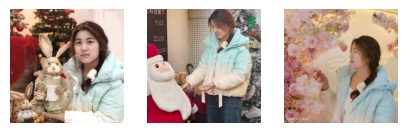

image batch shape: torch.Size([3, 3, 512, 512])
vae encoder output shape torch.Size([3, 4, 64, 64])
0 Conv2d(4, 4, kernel_size=(1, 1), stride=(1, 1)) torch.Size([3, 4, 64, 64])
1 Conv2d(4, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) torch.Size([3, 512, 64, 64])
2 VaeResidualBlock(
  (groupnorm_1): GroupNorm(32, 512, eps=1e-05, affine=True)
  (conv_1): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (groupnorm_2): GroupNorm(32, 512, eps=1e-05, affine=True)
  (conv_2): Conv2d(512, 512, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (residual_layer): Identity()
) torch.Size([3, 512, 64, 64])
3 VaeGlobalSelfAttention(
  (groupnorm): GroupNorm(32, 512, eps=1e-05, affine=True)
  (attention): MHSelfAttention(
    (in_proj): Linear(in_features=512, out_features=1536, bias=True)
    (out_proj): Linear(in_features=512, out_features=512, bias=True)
  )
) torch.Size([3, 512, 64, 64])
4 VaeResidualBlock(
  (groupnorm_1): GroupNorm(32, 512, eps=1e-05, affine=T

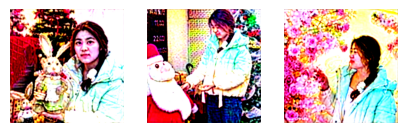

In [1]:
import torch 
import torch.nn as nn 
import torch.nn.functional as F 
from transformers import CLIPTokenizer



class MHSelfAttention(nn.Module):
    def __init__(self,numHeads=12,embeddingDimensions=768,\
                isCausalMask = False,\
                isInProjBias = True,isOutProjBias = True):
        super(MHSelfAttention,self).__init__()
        self.isInProjBias = isInProjBias 
        self.isOutProjBias = isOutProjBias
        self.embeddingDimensions = embeddingDimensions 
        self.numHeads = numHeads 
        self.isCausalMask = isCausalMask 
        self.headDimensions = self.embeddingDimensions//self.numHeads 
        self.in_proj  = nn.Linear(in_features = embeddingDimensions, out_features = 3*embeddingDimensions,bias = self.isInProjBias)
        self.out_proj  = nn.Linear(in_features = embeddingDimensions, out_features = embeddingDimensions,bias = self.isOutProjBias)
    
    def forward(self,inputs):
        B,N,D = inputs.shape 
        
        x = inputs 
        x = self.in_proj(x)
        Q,K,V = x.chunk(3,dim = -1 )
        Q = Q.reshape(B,N,self.numHeads,self.headDimensions)  # B,N,H,Dh
        Q = Q.permute(0,2,1,3)
        K = K.reshape(B,N,self.numHeads,self.headDimensions)
        K = K.permute(0,2,1,3)
        V = V.reshape(B,N,self.numHeads,self.headDimensions)
        V = V.permute(0,2,1,3)
        attention = Q @ K.permute(0,1,3,2) 
        attention = attention * self.headDimensions**(-0.5)
        if self.isCausalMask ==True:
            mask = torch.ones(N,N,dtype = torch.bool,device=attention.device).triu(diagonal = 1) # not including the digonal 
            attention.masked_fill_(mask,-torch.inf)
        
        attention = F.softmax(attention,dim = -1 )    
        x = attention @ V # B,H,N,Dh
        x = x.permute(0,2,1,3)
        x = x.reshape(B,N,self.embeddingDimensions) # B,N,D
           
        
        return x 



class ClipEmbedding(nn.Module):
    def __init__(self,numVocabularies = 49408,numEmbeddings = 768,numTokens = 77):
        super(ClipEmbedding,self).__init__()
        self.numVocabularies = numVocabularies
        self.numEmbeddings = numEmbeddings 
        self.numTokens = numTokens
        #
        self.token_embedding = nn.Embedding(num_embeddings=self.numVocabularies,embedding_dim=self.numEmbeddings)
        # 77,768
        self.position_embedding = nn.Parameter(torch.zeros(self.numTokens,self.numEmbeddings))
    
    def forward(self,inputs):
        x = inputs 
        # B maxTokens 
        x = self.token_embedding(x)
        print(f'token embedding shape {x.shape}')
        x = x + self.position_embedding
        return x 



class ClipEncoderLayer(nn.Module):
    def __init__(self,numHeads=12,embeddingDimensions = 768):
        super(ClipEncoderLayer,self).__init__()
        self.numHeads = numHeads 
        self.embeddingDimensions = embeddingDimensions
        self.layernorm_1 = nn.LayerNorm(normalized_shape=self.embeddingDimensions) 
        self.attention  =  MHSelfAttention(numHeads=self.numHeads,embeddingDimensions=self.embeddingDimensions,isCausalMask = True)
        self.layernorm_2 = nn.LayerNorm(normalized_shape = self.embeddingDimensions)
        self.linear_1  = nn.Linear(in_features = self.embeddingDimensions,out_features = 4 * self.embeddingDimensions)
        self.linear_2  = nn.Linear(in_features= 4* self.embeddingDimensions, out_features = self.embeddingDimensions)
    
    
    def _quickGelu(self,x):
        x = x * torch.sigmoid(1.702*x)
        return x 
    
    def forward(self,inputs):
        x = inputs  # B,N,D -> B,77,768
        
        # Self Attention Layer
        residual = x 
        x = self.layernorm_1(x)
        x = self.attention(x)
        x = residual + x 
        
        # Feed Forward Layer
        residual = x         
        x = self.layernorm_2(x)
        x = self.linear_1(x) #  B,77,3072
        x = self._quickGelu(x)
        x = self.linear_2(x) # B,77,768
        x = residual + x       
        
        return x 
        
        

class ClipEncoder(nn.Module):
    def __init__(self):
        super(ClipEncoder,self).__init__()
        self.embedding = ClipEmbedding(numVocabularies = 49408,numEmbeddings = 768,numTokens = 77)
        self.layers = nn.ModuleList()
        self.numLayers = 12
        for i in range(self.numLayers):
            self.layers.append(ClipEncoderLayer(numHeads=12,embeddingDimensions=768))
        
        self.layernorm = nn.LayerNorm(normalized_shape = 768)
        
        
    def forward(self,inputs):
        x = inputs   # B,77
        x = x.to(torch.long)
        x = self.embedding(x)
        for layer in self.layers:
            x  = layer(x)
        x = self.layernorm(x)    
        return x
            



import torch 
import torch.nn as nn 
import torch.nn.functional as F 
from transformers import CLIPTokenizer

class VaeResidualBlock(nn.Module):
    def __init__(self,inChannels,outChannels):
        super(VaeResidualBlock,self).__init__()
        self.inChannels = inChannels
        self.outChannels = outChannels
        self.groupnorm_1 = nn.GroupNorm(num_groups=32, num_channels=self.inChannels)
        self.conv_1 = nn.Conv2d(in_channels=self.inChannels,out_channels=self.outChannels,kernel_size=3,padding=1)
        
        self.groupnorm_2 = nn.GroupNorm(num_groups=32, num_channels=self.outChannels)
        self.conv_2 = nn.Conv2d(in_channels= self.outChannels,out_channels= self.outChannels,kernel_size = 3, padding = 1)
        
        self.residual_layer = None 
        if self.inChannels == self.outChannels:
            self.residual_layer = nn.Identity()
        else:
            self.residual_layer = nn.Conv2d(in_channels=self.inChannels,out_channels=self.outChannels,kernel_size=1,padding=0)
    
    def forward(self,inputs):
        x = inputs    # B C H W
        residual =  x 
        x = self.groupnorm_1(x)
        x = F.silu(x)
        x = self.conv_1(x)  # B inChannels H W ->B outChannels H W
        x = self.groupnorm_2(x)
        x = F.silu(x)
        x = self.conv_2(x)  # B outChannels H W -> B outChannels H W
        x = x + self.residual_layer(residual)
        
        return x



class VaeGlobalSelfAttention(nn.Module):
    def __init__(self,numHeads=1,embeddingDimensions=768,isCausalMask = False):
        super(VaeGlobalSelfAttention,self).__init__()
        self.numHeads = numHeads
        self.embeddingDimensions = embeddingDimensions
        self.isCausalMask = isCausalMask
        self.groupnorm =  nn.GroupNorm(num_groups=32, num_channels=self.embeddingDimensions)
        self.attention = MHSelfAttention(numHeads = self.numHeads,embeddingDimensions=self.embeddingDimensions,isCausalMask=False)
        
    def forward(self,inputs):
        x = inputs  # Batch cLatent hLatent wLatent ->B 4 64 64 
        residual = x 
        N,C,H,W = inputs.shape   # B 4 64 64
        x = self.groupnorm(x)
        x = x.reshape(N,C,H*W)   # B 4 4096
        x = x.permute(0,2,1)     # B 4096 4
        x = self.attention(x)   # B 4096 4
        x = x.permute(0,2,1)   # B 4 4096
        x = x.reshape(N,C,H,W)   # B 4 64 64
        x = x + residual 
        return x 
    



class VaeEncoder(nn.Sequential):
    def __init__(self):        
        blocks = [
                 nn.Conv2d(in_channels=3,out_channels=128,kernel_size=3,padding=1),   # B 3 512 512 -> B 128 512 512
                 VaeResidualBlock(inChannels=128,outChannels=128),    # B 128 512 512->B 128 512 512
                 VaeResidualBlock(inChannels=128,outChannels=128),   #  B 128 512 512->B 128 512 512
                 
                 # down sampling  B,C,H/2, W/2
                 nn.Conv2d(in_channels=128,out_channels = 128,kernel_size = 3,stride = 2 ,padding = 0),  # B 128 512 512 ->B 128 256 256
                 VaeResidualBlock(inChannels=128,outChannels=256),
                 VaeResidualBlock(inChannels=256,outChannels=256),
                 
                 # down sampling B,C,H/4, W/4
                 nn.Conv2d(in_channels=256,out_channels=256,kernel_size=3,stride=2,padding=0),
                 VaeResidualBlock(inChannels=256,outChannels=512),
                 VaeResidualBlock(inChannels=512,outChannels=512 ),   # B 512 128 128 ->B 512 128 128
                 
                 # down sampling B,C,H/8, W/8
                 nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,stride=2,padding=0), #B 512 128 128 ->B 512 64 64
                 VaeResidualBlock(inChannels=512,outChannels=512),
                 VaeResidualBlock(inChannels=512,outChannels=512),
                 VaeResidualBlock(inChannels=512,outChannels=512),
                 
                 #  add attention layer
                 VaeGlobalSelfAttention(numHeads=1,embeddingDimensions=512),    # B 512 64 64 ->B 512 64 64
                 VaeResidualBlock(inChannels=512,outChannels=512),
                 # nonlinear layer
                 nn.GroupNorm(num_groups=32, num_channels=512),
                 nn.SiLU(),
                 
                 # reduce dimension
                 nn.Conv2d(in_channels=512,out_channels=8,kernel_size=3,padding=1),  # B 512 64 64 ->B 8 64 64
                 nn.Conv2d(in_channels=8,out_channels=8,kernel_size=1,padding=0)
                 
                                  
                 ]
        super(VaeEncoder,self).__init__(*blocks)
    
    
    def forward(self,inputs,inputNoise):
        x = inputs    # B 8 64 64 
        #print(f'inputs shape {x.shape}')
        noise = inputNoise  # B 4 64 64
        #print(f'noise shape {noise.shape}')
        for name,layer in self._modules.items():            
            if isinstance(layer,nn.Conv2d) and layer.stride ==(2,2):
                x = F.pad(x,(0,1,0,1))
            x = layer(x)
            #print(name,layer,x.shape)
        
        mean,logVariance = torch.chunk(x,chunks=2,dim = 1)
        logVarianceClamp = torch.clamp(logVariance,-30,20)
        varianceClamp = torch.exp(logVarianceClamp)
        stdVarianceClamp = torch.sqrt(varianceClamp)
        #print(f'mean shape {mean.shape}')
        #print(f'variance shape {varianceClamp.shape}')        
        latentImageNoised =  mean + stdVarianceClamp * noise 
        lantenImageNoised = latentImageNoised * 0.18125
               
        return latentImageNoised

class VaeDecoder(nn.Sequential):
    def __init__(self, ):
        blocks = [  #increase dimension 4->512
                    nn.Conv2d(in_channels=4,out_channels=4,kernel_size = 1,padding=0), # B 4 64 64 ->B 4 64 64
                    nn.Conv2d(in_channels=4,out_channels=512,kernel_size = 3,padding=1),  # B 4 64 64 ->B 512 64 64
                    
                    # add self attention layer
                    VaeResidualBlock(inChannels=512,outChannels=512),
                    VaeGlobalSelfAttention(numHeads=1,embeddingDimensions=512),
                    
                    # four residual blocks   # B 512 64 64 ->B 512 64 64
                    VaeResidualBlock(inChannels=512,outChannels=512),
                    VaeResidualBlock(inChannels=512,outChannels=512),
                    VaeResidualBlock(inChannels=512,outChannels=512),
                    VaeResidualBlock(inChannels=512,outChannels=512),
                    
                    # scale up sampling  # B 512 64 64 ->B 512 128 128
                    nn.Upsample(scale_factor=2, mode='nearest'),
                    nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,padding=1),
                    
                    VaeResidualBlock(inChannels=512,outChannels=512),
                    VaeResidualBlock(inChannels=512,outChannels=512),
                    VaeResidualBlock(inChannels=512,outChannels=512),
                    
                    
                    
                    #  scale up sampling  # B 512 128 128 ->B 256 256 256
                    nn.Upsample(scale_factor=2, mode='nearest'),
                    nn.Conv2d(in_channels=512,out_channels=512,kernel_size=3,padding=1),
                    VaeResidualBlock(inChannels=512,outChannels=256),
                    VaeResidualBlock(inChannels=256,outChannels=256),
                    VaeResidualBlock(inChannels=256,outChannels=256),
                    
                    
                    # scale up sampling  # B 256 256 256 ->B 128 512 512
                    nn.Upsample(scale_factor=2,mode='nearest'),
                    nn.Conv2d(in_channels=256,out_channels=256,kernel_size=3,padding=1),
                    VaeResidualBlock(inChannels=256,outChannels=128),
                    VaeResidualBlock(inChannels=128,outChannels=128),
                    VaeResidualBlock(inChannels=128,outChannels=128),
                    
                    
                    # group norm and silu
                    nn.GroupNorm(num_groups=32, num_channels=128),
                    nn.SiLU(),
                    nn.Conv2d(in_channels=128,out_channels=3,kernel_size=3,padding=1),
                    
                    
        ]
        super(VaeDecoder, self).__init__(*blocks)
    
    
    def forward(self,inputs):
        x = inputs 
        x = x /0.18125
        for name,layer in self._modules.items():
            x = layer(x)
            print(name,layer,x.shape)
        return x
    




import cv2 
import numpy as np 
import matplotlib.pyplot as plt
from torchvision import transforms
import StableDiffusion.ModelConverter
diffusionDict = StableDiffusion.ModelConverter.load_from_standard_weights(input_file='./models/inkpunk-diffusion-v1.ckpt',\
                                                            device = 'cuda')
img1 = cv2.imread('./images/pusiyue_front_1024_1024.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('./images/pusiyue_chrismastreet_1024_1024.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.imread('./images/pusiyue_rose_1024_1024.jpg')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
imgList = [img1, img2, img3]
fig, axes = plt.subplots(1, 3, figsize=(5, 5))
for ax, img in zip(axes, imgList):    
    ax.imshow(img)
    ax.axis("off")
plt.show()


with torch.no_grad():

    preprocess = transforms.Compose([
                    transforms.ToPILImage(),
                    transforms.Resize((512,512)),
                    transforms.ToTensor(),   # (0 255) -> (-1, 1)
                    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])# 
                    ])
    imgBatch = []
    for img in imgList:
        img = preprocess(img)
        imgBatch.append(img)
    imgBatch = torch.stack(imgBatch)
    print(f'image batch shape: {imgBatch.shape}')
    #  test VaeEncoder 
    device = 'cuda'
    testX = imgBatch
    testX = testX.to(device)
    #inputNoise = torch.randn(3, 4, 64, 64).to(device)
    inputNoise = torch.zeros(3, 4, 64, 64).to(device)
    vaeEncoder = VaeEncoder().to(device)
    vaeEncoder.load_state_dict(diffusionDict['encoder'],strict=True)
    testX = vaeEncoder(testX, inputNoise)
    print(f'vae encoder output shape {testX.shape}')
    vaeDecoder = VaeDecoder().to(device)
    vaeDecoder.load_state_dict(diffusionDict['decoder'])

    testX = vaeDecoder(testX)

    sum = 0 
    for name,parameter in vaeEncoder.named_parameters():
        #print(name, parameter.shape)
        sum = sum + parameter.numel()
    print(f'vae encoder total parameters {sum}')

    sum = 0 
    for name,parameter in vaeDecoder.named_parameters():
        sum = sum + parameter.numel()

    print(f'vae decoder total parameters {sum}')

    fig ,axes = plt.subplots(1, 3, figsize=(5, 5))
    axes = axes.flatten()
    imgsToShow = testX[:3,:3]
    print(imgsToShow.shape)
    for img,axis in zip(imgsToShow,axes ):
        img = img.cpu().detach().permute(1,2,0)
        #img = (img - img.min()) / (img.max() - img.min())
        img = (img +1)/2
        img = img.clamp(0,1)
        axis.imshow(img)
        axis.axis("off")    
    plt.show()

In [7]:
torch.min(imgsToShow[0])

tensor(-2.4585, device='cuda:0')

In [8]:
print(imgsToShow[0],torch.min(imgsToShow[0]),torch.max(imgsToShow[0]))


tensor([[[ 0.0059,  0.0302,  0.0637,  ...,  0.7847,  0.6239,  0.4870],
         [-0.0151,  0.0105,  0.0529,  ...,  1.0324,  0.8674,  0.6381],
         [-0.0767, -0.0404, -0.0249,  ...,  1.2088,  1.0138,  0.7809],
         ...,
         [ 0.3750,  0.5723,  0.7152,  ...,  1.6801,  1.5374,  1.2441],
         [ 0.3465,  0.5325,  0.6173,  ...,  1.5486,  1.4056,  1.0787],
         [ 0.2627,  0.4128,  0.4506,  ...,  1.2895,  1.0904,  0.8419]],

        [[-0.1032, -0.1252, -0.1151,  ...,  0.6430,  0.5336,  0.3718],
         [-0.1741, -0.2059, -0.1736,  ...,  0.8421,  0.7110,  0.4963],
         [-0.2498, -0.2830, -0.2742,  ...,  1.0251,  0.8664,  0.6143],
         ...,
         [-0.2653, -0.3050, -0.3524,  ...,  1.4603,  1.3294,  1.0117],
         [-0.1727, -0.2078, -0.2604,  ...,  1.3001,  1.1698,  0.8581],
         [-0.0845, -0.0922, -0.1466,  ...,  1.0342,  0.8913,  0.6387]],

        [[-0.2263, -0.2756, -0.2604,  ...,  0.5687,  0.4180,  0.2786],
         [-0.3177, -0.3704, -0.3421,  ...,  0

# prepare test image batch 

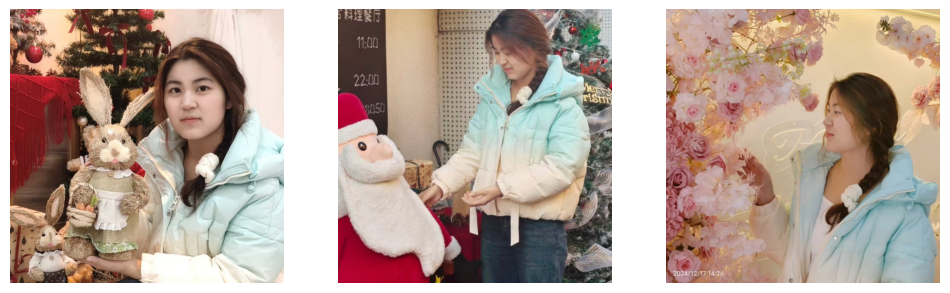

image batch shape: torch.Size([3, 3, 512, 512])


In [2]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt
from torchvision import transforms
img1 = cv2.imread('./images/pusiyue_front_1024_1024.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('./images/pusiyue_chrismastreet_1024_1024.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.imread('./images/pusiyue_rose_1024_1024.jpg')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
imgList = [img1, img2, img3]
fig, axes = plt.subplots(1, 3, figsize=(12, 4))
for ax, img in zip(axes, imgList):    
    ax.imshow(img)
    ax.axis("off")
plt.show()


preprocess = transforms.Compose([
                transforms.ToPILImage(),
                transforms.Resize((512,512)),
                transforms.ToTensor()
                ])
imgBatch = []
for img in imgList:
    img = preprocess(img)
    imgBatch.append(img)
imgBatch = torch.stack(imgBatch)
print(f'image batch shape: {imgBatch.shape}')

# test VaeEncoder

In [26]:
import gc
import torch

del testX, inputNoise, vaeEncoder, vaeDecoder
gc.collect()
torch.cuda.empty_cache()


NameError: name 'testX' is not defined

inputs shape torch.Size([3, 3, 512, 512])
noise shape torch.Size([3, 4, 64, 64])
0 Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1)) torch.Size([3, 128, 512, 512])
1 VaeResidualBlock(
  (groupnorm_1): GroupNorm(32, 128, eps=1e-05, affine=True)
  (conv_1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (groupnorm_2): GroupNorm(32, 128, eps=1e-05, affine=True)
  (conv_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (residual_layer): Identity()
) torch.Size([3, 128, 512, 512])
2 VaeResidualBlock(
  (groupnorm_1): GroupNorm(32, 128, eps=1e-05, affine=True)
  (conv_1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (groupnorm_2): GroupNorm(32, 128, eps=1e-05, affine=True)
  (conv_2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (residual_layer): Identity()
) torch.Size([3, 128, 512, 512])
3 Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2)) torch.Size([3, 128, 256, 256])
4 VaeRe

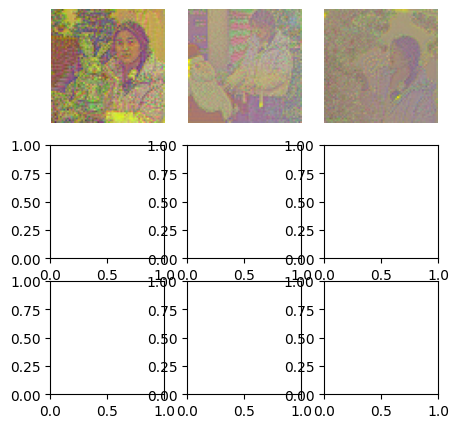

In [9]:
#  test VaeEncoder 
device = 'cuda'
testX = imgBatch
testX = testX.to(device)
inputNoise = torch.randn(3, 4, 64, 64).to(device)
vaeEncoder = VaeEncoder().to(device)
vaeEncoder.load_state_dict(diffusionDict['encoder'],strict=True)
testX = vaeEncoder(testX, inputNoise)
print(f'vae encoder output shape {testX.shape}')

sum = 0 
for name,parameter in vaeEncoder.named_parameters():
    print(name, parameter.shape)
    sum = sum + parameter.numel()
print(f'vae encoder total parameters {sum}')

fig ,axes = plt.subplots(3, 3, figsize=(5, 5))
axes = axes.flatten()
imgsToShow = testX[:9,:3]
print(imgsToShow.shape)
for img,axis in zip(imgsToShow,axes ):
    img = (img - img.min()) / (img.max() - img.min())
    axis.imshow(img.cpu().detach().permute(1,2,0))
    axis.axis("off")    
plt.show()

#  test VaeResidualBlock VaeGlobalSelfAttention

tensor([[[0.5843, 0.6902, 0.6078,  ..., 0.9137, 0.9176, 0.9176],
         [0.5804, 0.7020, 0.6275,  ..., 0.9137, 0.9176, 0.9176],
         [0.5216, 0.6667, 0.6235,  ..., 0.9137, 0.9176, 0.9176],
         ...,
         [0.7412, 0.5255, 0.4863,  ..., 0.9961, 0.9961, 0.9961],
         [0.5804, 0.5412, 0.4902,  ..., 0.9961, 0.9961, 0.9961],
         [0.4824, 0.4980, 0.4824,  ..., 0.9961, 0.9922, 0.9961]],

        [[0.4902, 0.5882, 0.4980,  ..., 0.8431, 0.8471, 0.8471],
         [0.4863, 0.6000, 0.5137,  ..., 0.8431, 0.8471, 0.8471],
         [0.4275, 0.5647, 0.5098,  ..., 0.8431, 0.8471, 0.8471],
         ...,
         [0.5765, 0.3373, 0.2549,  ..., 0.9451, 0.9529, 0.9608],
         [0.4039, 0.3373, 0.2471,  ..., 0.9490, 0.9608, 0.9686],
         [0.2667, 0.2706, 0.2314,  ..., 0.9529, 0.9608, 0.9725]],

        [[0.4431, 0.5412, 0.4510,  ..., 0.8039, 0.8078, 0.8078],
         [0.4392, 0.5490, 0.4667,  ..., 0.8039, 0.8078, 0.8078],
         [0.3804, 0.5137, 0.4627,  ..., 0.8039, 0.8078, 0.

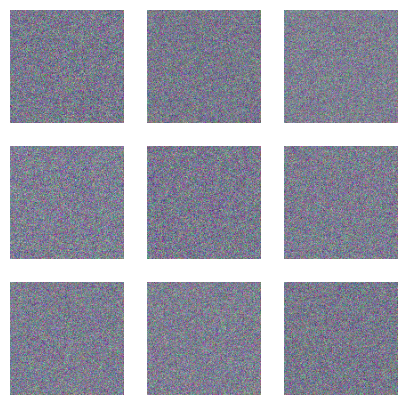

In [15]:
device = 'cuda'
testX = imgBatch
vaeEncoder = VaeEncoder().to(device)
inputNoise = torch.randn(10, 32, 128, 128).to(device)
#testX = vaeEncoder(testX, inputNoise)
testX = vaeResidualBlock(testX)
#testX = vaeGlobalSelfAttention(testX)
#testX = vaeEncoder(testX, inputNoise)

fig ,axes = plt.subplots(3, 3, figsize=(5, 5))
axes = axes.flatten()
imgsToShow = testX[:9,:3]
print(imgsToShow.shape)
for img,axis in zip(imgsToShow,axes ):
    img = (img - img.min()) / (img.max() - img.min())
    axis.imshow(img.cpu().detach().permute(1,2,0))
    axis.axis("off")
    
plt.show()

#  VAE Decoder and testing 


# Unet 

In [5]:

import torch 
import torch.nn as nn 
import torch.nn.functional as F 
from transformers import CLIPTokenizer
class TimeEmbedding(nn.Module):
    def __init__(self,embeddingDimension = 320):
        super(TimeEmbedding,self).__init__()
        self.embeddingDimension = embeddingDimension
        self.linear_1  = nn.Linear(self.embeddingDimension, 4 * self.embeddingDimension)
        self.linear_2  = nn.Linear(4 * self.embeddingDimension, 4 * self.embeddingDimension)
    
    def forward(self,inputTime):
        x = inputTime# 1,320
        x = self.linear_1(x)
        x = self.linear_2(x)
        return x 


class UpScaleTwo(nn.Module):
    def __init__(self,inChannels):
        super(UpScaleTwo,self).__init__()
        self.inChannels = inChannels
        self.upScaleTwo = nn.Upsample(scale_factor=2,mode='nearest')
        self.conv =  nn.Conv2d(in_channels=self.inChannels,out_channels=self.inChannels,kernel_size=3,padding=1)
    def forward(self,inputs):
        x = inputs
        x  = self.upScaleTwo(x)
        x = self.conv(x)
        return x 


class UnetResidualBlock(nn.Module):
    def __init__(self,inChannels,outChannels,timeEmbeddingDimension = 1280):
        super(UnetResidualBlock,self).__init__()
        self.inChannels = inChannels
        self.outChannels = outChannels
        self.timeEmbeddingDimension = timeEmbeddingDimension
        self.silu = nn.SiLU()
        self.groupnorm_features = nn.GroupNorm(num_groups=32, num_channels=self.inChannels)
        self.conv_feature = nn.Conv2d(in_channels=self.inChannels,out_channels=self.outChannels,kernel_size=3,padding=1)
        self.linear_time = nn.Linear(in_features=self.timeEmbeddingDimension,out_features=self.outChannels)
        self.groupnorm_merged = nn.GroupNorm(num_groups=32, num_channels=self.outChannels)
        self.conv_merged = nn.Conv2d(in_channels=self.outChannels,out_channels=self.outChannels,kernel_size=3,padding=1)
        self.residual_layer = None
        if self.inChannels == self.outChannels:
            self.residual_layer = nn.Identity()
            
        if self.inChannels != self.outChannels:
            self.residual_layer = nn.Conv2d(in_channels=self.inChannels,out_channels=self.outChannels,kernel_size=1,padding=0)
        
    
    def forward(self,inputs,time):
        x = inputs  #  B C H W   
        residual = x 
        timeX  = time  #  1 1280  
        timeX = self.silu(timeX)
        timeX = self.linear_time(timeX) # 1 C 
        timeX = timeX[:,:,None,None]   # 1 C 1 1 
        x  = self.groupnorm_features(x)
        x =  self.silu(x)
        x = self.conv_feature(x)
        mergedX= x + timeX 
        mergedX = self.groupnorm_merged(mergedX)
        mergedX = self.silu(mergedX)
        mergedX = self.conv_merged(mergedX)
        
        mergedX = mergedX + self.residual_layer(residual)        
        return mergedX



class UnetGlobalCrossAttentionBlock(nn.Module):
    def __init__(self,numHeads=8,latentEmbeddingDimension=1280,contextEmbeddingDimension=768):
        super(UnetGlobalCrossAttentionBlock,self).__init__()
        self.numHeads = numHeads
        self.latentEmbeddingDimension = latentEmbeddingDimension
        self.headDimension = self.latentEmbeddingDimension // self.numHeads
        self.contextEmbeddingDimension = contextEmbeddingDimension
        self.groupnorm = nn.GroupNorm(num_groups=32, num_channels=self.latentEmbeddingDimension,eps=1e-6)
        self.conv_input = nn.Conv2d(in_channels = self.latentEmbeddingDimension,out_channels=self.latentEmbeddingDimension,kernel_size=1,padding=0)
        self.layernorm_1 =  nn.LayerNorm(self.latentEmbeddingDimension)
        self.attention_1 = MHSelfAttention(numHeads=self.numHeads,embeddingDimensions=self.latentEmbeddingDimension,isInProjBias=False,isOutProjBias=True)
        self.layernorm_2 = nn.LayerNorm(self.latentEmbeddingDimension)
        self.attention_2 = MHCrossAttention(numHeads=self.numHeads,latentEmbeddingDimension=self.latentEmbeddingDimension,\
                                            contextEmbeddingDimension=self.contextEmbeddingDimension,isInProjBias=False,isOutProjBias=True)
        self.layernorm_3 = nn.LayerNorm(self.latentEmbeddingDimension)
        self.linear_geglu1 = nn.Linear(in_features=self.latentEmbeddingDimension,out_features=self.latentEmbeddingDimension *4 * 2)
        self.linear_geglu2 = nn.Linear(in_features=4*self.latentEmbeddingDimension,out_features=self.latentEmbeddingDimension)
        self.conv_output = nn.Conv2d(in_channels = self.latentEmbeddingDimension,out_channels=self.latentEmbeddingDimension,kernel_size=1,padding=0)
        
    
    def forward(self,latentInput,contextInput):
        latentX = latentInput   #  B C H W 
        B,C,H,W = latentX.shape
        contextY = contextInput  # B N D
        B,N,D = contextY.shape
        
        residual = latentX 
        
        latentX = self.groupnorm(latentX)   
        latentX = self.conv_input(latentX)  # B C H W 
        
        
        latentX = latentX.reshape(B,C,H*W)   # B C H*W 
        latentX = latentX.permute(0,2,1)  # B H*W C
        
        residualSelfAttention = latentX 
        latentX = self.layernorm_1(latentX)
        latentX = self.attention_1(latentX)
        latentX = residualSelfAttention + latentX
        
        residualCrossAttention = latentX  
        latentX = self.layernorm_2(latentX)
        latentX = self.attention_2(latentX,contextY)
        
        latentX = latentX + residualCrossAttention
        
        residualGeGlu = latentX 
        latentX = self.layernorm_3(latentX)
        latentX = self.linear_geglu1(latentX)  # B H*W C*4*2 
        latentX,latentXGate = latentX.chunk(chunks = 2, dim = -1 )
        latentX  = latentX * F.gelu(latentXGate)   # B H*W 4*C   
        latentX = self.linear_geglu2(latentX)  # B H*W C 
        latentX = latentX + residualGeGlu
        
        latentX = latentX.permute(0,2,1)
        latentX = latentX.reshape(B,C,H,W)
        
        latentX = self.conv_output(latentX) + residual
        
        return latentX

class MHSelfAttention(nn.Module):
    def __init__(self,numHeads=12,embeddingDimensions=768,\
                isCausalMask = False,\
                isInProjBias = True,isOutProjBias = True):
        super(MHSelfAttention,self).__init__()
        self.isInProjBias = isInProjBias 
        self.isOutProjBias = isOutProjBias
        self.embeddingDimensions = embeddingDimensions 
        self.numHeads = numHeads 
        self.isCausalMask = isCausalMask 
        self.headDimensions = self.embeddingDimensions//self.numHeads 
        self.in_proj  = nn.Linear(in_features = embeddingDimensions, out_features = 3*embeddingDimensions,bias = self.isInProjBias)
        self.out_proj  = nn.Linear(in_features = embeddingDimensions, out_features = embeddingDimensions,bias = self.isOutProjBias)
    
    def forward(self,inputs):
        B,N,D = inputs.shape 
        
        x = inputs 
        x = self.in_proj(x)
        Q,K,V = x.chunk(3,dim = -1 )
        Q = Q.reshape(B,N,self.numHeads,self.headDimensions)  # B,N,H,Dh
        Q = Q.permute(0,2,1,3)
        K = K.reshape(B,N,self.numHeads,self.headDimensions)
        K = K.permute(0,2,1,3)
        V = V.reshape(B,N,self.numHeads,self.headDimensions)
        V = V.permute(0,2,1,3)
        attention = Q @ K.permute(0,1,3,2) 
        attention = attention * self.headDimensions**(-0.5)
        if self.isCausalMask ==True:
            mask = torch.ones(N,N,dtype = torch.bool,device=attention.device).triu(diagonal = 1) # not including the digonal 
            attention.masked_fill_(mask,-torch.inf)
        
        attention = F.softmax(attention,dim = -1 )    
        x = attention @ V # B,H,N,Dh
        x = x.permute(0,2,1,3)
        x = x.reshape(B,N,self.embeddingDimensions) # B,N,D
           
        
        return x 


        
class MHCrossAttention(nn.Module):
    def __init__(self,numHeads=8,latentEmbeddingDimension=1280,contextEmbeddingDimension = 768,isInProjBias = True,isOutProjBias = True): 
        super(MHCrossAttention,self).__init__()
        self.numHeads = numHeads 
        self.latentEmbeddingDimension = latentEmbeddingDimension
        self.contextEmbeddingDimension = contextEmbeddingDimension
        self.isInProjBias = isInProjBias
        self.isOutProjBias = isOutProjBias
        self.headDimension = self.latentEmbeddingDimension//self.numHeads
        self.q_proj = nn.Linear(in_features=self.latentEmbeddingDimension,out_features=self.latentEmbeddingDimension,bias=self.isInProjBias)
        self.k_proj = nn.Linear(in_features= self.contextEmbeddingDimension,out_features=self.latentEmbeddingDimension,bias = self.isInProjBias)
        self.v_proj = nn.Linear(in_features=self.contextEmbeddingDimension,out_features=self.latentEmbeddingDimension,bias=self.isInProjBias)
        self.out_proj = nn.Linear(in_features=self.latentEmbeddingDimension,out_features=self.latentEmbeddingDimension,bias=self.isOutProjBias)
        
        
    
    def forward(self,inputLatent,inputContext):
        x = inputLatent  # B 4096 1280
        y = inputContext  # B 77 768
        B,latentN,latentD = inputLatent.shape 
        B,contextN,contextD = inputContext.shape 
        q = self.q_proj(x)
        k = self.k_proj(y)
        v = self.v_proj(y)
        q = q.reshape(B,latentN,self.numHeads,self.headDimension) # B 4096 8 160
        q = q.permute(0,2,1,3)  # B 8 4096 160
        k = k.reshape(B,contextN,self.numHeads,self.headDimension)  
        k = k.permute(0,2,1,3) # B 8 77  160
        v = v.reshape(B,contextN,self.numHeads,self.headDimension)  
        v = v.permute(0,2,1,3)# B 8 77  160
        print(f'q shape{q.shape} , k shape {k.shape},  v shape {v.shape}')
        attentionWeight = q @ k.permute(0,1,3,2)  # B 8 4096 77
        attentionWeight = attentionWeight * (self.headDimension ** -0.5)
        attentionWeight = F.softmax(attentionWeight,dim = -1)
        out = attentionWeight @ v  # B 8 4096 160
        out = out.permute(0,2,1,3)
        out = out.reshape(B,latentN,-1)
        out = self.out_proj(out)       
        
        x = out
        return x  
                  
class SequentialAdapter(nn.Sequential):
    def __init__(self,*modules):
        super(SequentialAdapter,self).__init__(*modules)
    
    def forward(self,latentX,contextY,timeStep):
        x = latentX # B C H W 
        y = contextY  # B N D 
        time = timeStep  # B 1280
        
        for module in self._modules.values():
            if isinstance(module,UnetResidualBlock):
                x = module(x,time)
            elif isinstance(module,UnetGlobalCrossAttentionBlock):
                x = module(x,y)
            else: 
                x = module(x)
        
        return x
                
               
class UnetOutputLayer(nn.Module):
    def __init__(self,inChannels=320,outChannels=4):
        super(UnetOutputLayer,self).__init__()
        self.inChannels = inChannels
        self.outChannels = outChannels  
        self.groupnorm = nn.GroupNorm(num_groups=32,num_channels=self.inChannels)
        self.conv = nn.Conv2d(in_channels=self.inChannels, out_channels = self.outChannels,kernel_size=3,padding = 1)
            
    def forward(self,lantentInput):
        x = lantentInput # B 320 64 64
        x = self.groupnorm(x)
        x = F.silu(x)
        x = self.conv(x) # B 4 64 64
        return x         
    
    


class UnetDenoise(nn.Module):
    def __init__(self,):
        super(UnetDenoise,self).__init__() 
        self.encoders = nn.ModuleList([
                        SequentialAdapter(nn.Conv2d(in_channels=4,out_channels = 320,kernel_size = 3,padding = 1)),  # B 4 64 64 -> B 320 64 64
                        SequentialAdapter(UnetResidualBlock(inChannels=320,outChannels= 320,timeEmbeddingDimension=1280),\
                                            UnetGlobalCrossAttentionBlock(numHeads=8,latentEmbeddingDimension=320,contextEmbeddingDimension=768)
                                         ) ,  
                        SequentialAdapter(UnetResidualBlock(inChannels=320,outChannels= 320),\
                                            UnetGlobalCrossAttentionBlock(numHeads=8,latentEmbeddingDimension=320,contextEmbeddingDimension=768)
                                         )  ,                
                            
            
                        ]) 
        
        self.bottelneck = nn.ModuleList([
            
                        ])
        
        self.decoders = nn.ModuleList([
            
                        ])
    def forward(self,latentInput,contextInput,timeStep):
        latent =    latentInput  #  B 4 64 64
        context = contextInput   # B 77 768
        time = timeStep
        
        for layer in self.encoders:
            latent = layer(latent,context,time)
        
        return latent
        


        


device = 'cuda'
timeEmbedding = TimeEmbedding(embeddingDimension=320).to(device)
time = torch.randn(1,320).to(device)
time = timeEmbedding(time)
print(time,time.shape)

testX = torch.randn(1,320,64,64).to(device)
upScaleTwo = UpScaleTwo(inChannels=320).to(device)
testX = upScaleTwo(testX)
print(testX.shape)
unetResidualBlock = UnetResidualBlock(inChannels=320,outChannels=640).to(device)
testXandTime = unetResidualBlock(testX,time)

imageInput = torch.randn(3,1280,64,64).to(device)
contextInput = torch.randn(3,77,768).to(device)
timeStep = torch.randn(1,1280).to(device)

unetGlobalCrossAttentionBlock = UnetGlobalCrossAttentionBlock(numHeads=8,latentEmbeddingDimension=1280,contextEmbeddingDimension=768).to(device)
imageOut = unetGlobalCrossAttentionBlock(imageInput,contextInput)
unetResidualBlock = UnetResidualBlock(inChannels=1280,outChannels=640).to(device)
conv2d = nn.Conv2d(in_channels=640,out_channels=320,kernel_size=1).to(device)



for name,parameter in unetGlobalCrossAttentionBlock.named_parameters():
    print(name,parameter.shape)

for name,paramter in upScaleTwo.named_parameters():
    print(name,paramter.shape)


for name,paramter in unetResidualBlock.named_parameters():
    print(name,paramter.shape)


testLatent = torch.randn(3,4096,1280)
testContext = torch.randn(3,77,768)
mhCrossAttention = MHCrossAttention(numHeads = 8,latentEmbeddingDimension=1280,contextEmbeddingDimension=768,isInProjBias=True,isOutProjBias = True)    
testX  = mhCrossAttention(testLatent,testContext)
for name,parameter in mhCrossAttention.named_parameters():
    print(name,parameter.shape)





#test  SequentialAdapter
sequentialAdapter = SequentialAdapter(unetGlobalCrossAttentionBlock,unetResidualBlock,conv2d)
testX = sequentialAdapter(imageInput,contextInput,timeStep)
print(f'sequentialAdapter output shape {testX.shape}')



# test UnetOutputLayer
unetOutputLayer = UnetOutputLayer(inChannels = 320,outChannels = 4).to(device)
testX = torch.randn(3,320,64,64).to(device)
testX = unetOutputLayer(testX) 
for name,param in unetOutputLayer.named_parameters():
    print(name,param.shape)
    


unetDenoise = UnetDenoise()
latentX = torch.randn(3,4,64,64) 
contextY = torch.randn(3,77,768)
timeEmbedding = torch.randn(1,1280)
testX = unetDenoise(latentX,contextY,timeEmbedding)

for name,param in unetDenoise.named_parameters():
    print(name,param.shape)



tensor([[-0.5241, -0.1975, -0.1815,  ...,  0.0945,  0.0636, -0.3802]],
       device='cuda:0', grad_fn=<AddmmBackward0>) torch.Size([1, 1280])
torch.Size([1, 320, 128, 128])
q shapetorch.Size([3, 8, 4096, 160]) , k shape torch.Size([3, 8, 77, 160]),  v shape torch.Size([3, 8, 77, 160])
groupnorm.weight torch.Size([1280])
groupnorm.bias torch.Size([1280])
conv_input.weight torch.Size([1280, 1280, 1, 1])
conv_input.bias torch.Size([1280])
layernorm_1.weight torch.Size([1280])
layernorm_1.bias torch.Size([1280])
attention_1.in_proj.weight torch.Size([3840, 1280])
attention_1.out_proj.weight torch.Size([1280, 1280])
attention_1.out_proj.bias torch.Size([1280])
layernorm_2.weight torch.Size([1280])
layernorm_2.bias torch.Size([1280])
attention_2.q_proj.weight torch.Size([1280, 1280])
attention_2.k_proj.weight torch.Size([1280, 768])
attention_2.v_proj.weight torch.Size([1280, 768])
attention_2.out_proj.weight torch.Size([1280, 1280])
attention_2.out_proj.bias torch.Size([1280])
layernorm_3.

# unet test unit

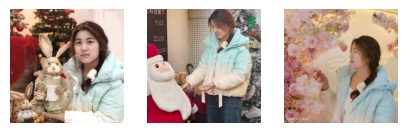

image batch shape: torch.Size([3, 3, 512, 512])
vae encoder output shape torch.Size([3, 4, 64, 64])
vae encoder total parameters 34163664
torch.Size([3, 3, 64, 64])


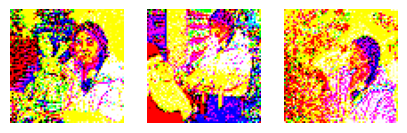

In [9]:

# for test unet 

import cv2 
import numpy as np 
import matplotlib.pyplot as plt
from torchvision import transforms
import StableDiffusion.ModelConverter
diffusionDict = StableDiffusion.ModelConverter.load_from_standard_weights(input_file='./models/inkpunk-diffusion-v1.ckpt',\
                                                            device = 'cuda')
img1 = cv2.imread('./images/pusiyue_front_1024_1024.jpg')
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB)
img2 = cv2.imread('./images/pusiyue_chrismastreet_1024_1024.jpg')
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB)
img3 = cv2.imread('./images/pusiyue_rose_1024_1024.jpg')
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB)
imgList = [img1, img2, img3]
fig, axes = plt.subplots(1, 3, figsize=(5, 5))
for ax, img in zip(axes, imgList):    
    ax.imshow(img)
    ax.axis("off")
plt.show()


with torch.no_grad():

    preprocess = transforms.Compose([
                    transforms.ToPILImage(),
                    transforms.Resize((512,512)),
                    transforms.ToTensor(),   # (0 255) -> (-1, 1)
                    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])# 
                    ])
    imgBatch = []
    for img in imgList:
        img = preprocess(img)
        imgBatch.append(img)
    imgBatch = torch.stack(imgBatch)
    print(f'image batch shape: {imgBatch.shape}')
    #  test VaeEncoder 
    device = 'cuda'
    testX = imgBatch
    testX = testX.to(device)
    #inputNoise = torch.randn(3, 4, 64, 64).to(device)
    inputNoise = torch.zeros(3, 4, 64, 64).to(device)
    vaeEncoder = VaeEncoder().to(device)
    vaeEncoder.load_state_dict(diffusionDict['encoder'],strict=True)
    testX = vaeEncoder(testX, inputNoise)
    print(f'vae encoder output shape {testX.shape}')  


    sum = 0 
    for name,parameter in vaeEncoder.named_parameters():
        #print(name, parameter.shape)
        sum = sum + parameter.numel()
    print(f'vae encoder total parameters {sum}')
    
    fig ,axes = plt.subplots(1, 3, figsize=(5, 5))
    axes = axes.flatten()
    imgsToShow = testX[:3,:3]
    print(imgsToShow.shape)
    for img,axis in zip(imgsToShow,axes ):
        img = img.cpu().detach().permute(1,2,0)
        #img = (img - img.min()) / (img.max() - img.min())
        img = (img +1)/2
        img = img.clamp(0,1)
        axis.imshow(img)
        axis.axis("off")    
    plt.show()